In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
print('Finsihed loading libs')

Finsihed loading libs


In [38]:
orig_x = np.load('X.npy')
orig_y = np.load('Y.npy')
print('finsihed reading data')

finsihed reading data


In [39]:
print(orig_x.shape)
print(orig_y.shape)
print(type(orig_y))
print("Finished reading input data")
orig_y = np.argmax(orig_y, axis = 1)
print(orig_y.shape)

(2062, 64, 64)
(2062, 10)
<class 'numpy.ndarray'>
Finished reading input data
(2062,)


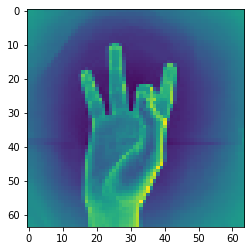

In [4]:
plt.imshow(orig_x[1751,:,:])

In [5]:
print(type(orig_x))
print(type(orig_y))
orig_x = orig_x[:,1]
print(orig_x.shape)
print(orig_y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2062, 64)
(2062,)


In [6]:
df_x = pd.DataFrame(orig_x)
df_y = pd.DataFrame(orig_y)
print(df_x.shape)
print(df_y.shape)
print(type(df_x))
print(type(df_y))

(2062, 64)
(2062, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
print(type(df_x))
print(type(df_y))
df_y = df_y.iloc[:,0]
print(type(df_y))
print(df_y.shape)
print(df_y.head)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2062,)
<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
2057    9
2058    9
2059    9
2060    9
2061    9
Name: 0, Length: 2062, dtype: int64>


In [8]:
print(df_y[1])
print(df_y[7])

0
0


In [9]:
oneInst = df_x.iloc[7]
print(oneInst.shape)
print(type(oneInst))

oneInst = oneInst.values.reshape(8,8)
print(oneInst.shape)

from PIL import Image
img = Image.fromarray(oneInst)
img.show()
print("Finished")

(64,)
<class 'pandas.core.series.Series'>
(8, 8)
Finished


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=42)

In [11]:
x_train = x_train
x_test = x_test 

In [12]:
model = keras.models.Sequential()
print("Initialized model")

Initialized model


In [13]:
model.add(keras.layers.Flatten(input_shape=[8,8]))
print('Finsihed setting the input layer')

Finsihed setting the input layer


In [14]:
model.add(keras.layers.Dense( 64, activation='relu'))
print("Added hidden layer 1")

Added hidden layer 1


In [15]:
model.add(keras.layers.Dense(64, activation="relu"))
print('Added hidden layer 2')

Added hidden layer 2


In [16]:
model.add(keras.layers.Dense(10, activation='softmax'))
print("Added output layer")

Added output layer


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", 
              metrics = ['accuracy'])
print("Finished compiling")

Finished compiling


In [19]:
print(x_train.shape)
print(y_train.shape)

(1649, 64)
(1649,)


In [20]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
print("Finished categorizing the labels (output)")

Finished categorizing the labels (output)


In [21]:
print(y_train_categorical.shape)

(1649, 10)


In [22]:
# Train the model.
history = model.fit(
  x_train,
  y_train_categorical,
  epochs=500,
  batch_size=32,
  verbose=True
)

Epoch 1/500
52/52 [==============================] - 0s 442us/step - loss: 2.3312 - accuracy: 0.1037
Epoch 2/500
52/52 [==============================] - 0s 385us/step - loss: 2.3097 - accuracy: 0.1201
Epoch 3/500
52/52 [==============================] - 0s 385us/step - loss: 2.3048 - accuracy: 0.1079
Epoch 4/500
52/52 [==============================] - 0s 365us/step - loss: 2.3028 - accuracy: 0.1158
Epoch 5/500
52/52 [==============================] - 0s 385us/step - loss: 2.3021 - accuracy: 0.1098
Epoch 6/500
52/52 [==============================] - 0s 385us/step - loss: 2.3018 - accuracy: 0.1104
Epoch 7/500
52/52 [==============================] - 0s 365us/step - loss: 2.3015 - accuracy: 0.1225
Epoch 8/500
52/52 [==============================] - 0s 385us/step - loss: 2.3013 - accuracy: 0.1176
Epoch 9/500
52/52 [==============================] - 0s 365us/step - loss: 2.3011 - accuracy: 0.1189
Epoch 10/500
52/52 [==============================] - 0s 385us/step - loss: 2.3010 - accura

52/52 [==============================] - 0s 365us/step - loss: 2.2954 - accuracy: 0.1310
Epoch 78/500
52/52 [==============================] - 0s 404us/step - loss: 2.2952 - accuracy: 0.1310
Epoch 79/500
52/52 [==============================] - 0s 404us/step - loss: 2.2953 - accuracy: 0.1292
Epoch 80/500
52/52 [==============================] - 0s 385us/step - loss: 2.2951 - accuracy: 0.1340
Epoch 81/500
52/52 [==============================] - 0s 404us/step - loss: 2.2950 - accuracy: 0.1261
Epoch 82/500
52/52 [==============================] - 0s 385us/step - loss: 2.2948 - accuracy: 0.1255
Epoch 83/500
52/52 [==============================] - 0s 385us/step - loss: 2.2948 - accuracy: 0.1273
Epoch 84/500
52/52 [==============================] - 0s 385us/step - loss: 2.2946 - accuracy: 0.1267
Epoch 85/500
52/52 [==============================] - 0s 385us/step - loss: 2.2946 - accuracy: 0.1255
Epoch 86/500
52/52 [==============================] - 0s 385us/step - loss: 2.2945 - accuracy: 

52/52 [==============================] - 0s 385us/step - loss: 2.2860 - accuracy: 0.1267
Epoch 157/500
52/52 [==============================] - 0s 385us/step - loss: 2.2857 - accuracy: 0.1340
Epoch 158/500
52/52 [==============================] - 0s 385us/step - loss: 2.2856 - accuracy: 0.1322
Epoch 159/500
52/52 [==============================] - 0s 385us/step - loss: 2.2859 - accuracy: 0.1286
Epoch 160/500
52/52 [==============================] - 0s 385us/step - loss: 2.2854 - accuracy: 0.1304
Epoch 161/500
52/52 [==============================] - 0s 385us/step - loss: 2.2851 - accuracy: 0.1286
Epoch 162/500
52/52 [==============================] - 0s 404us/step - loss: 2.2852 - accuracy: 0.1383
Epoch 163/500
52/52 [==============================] - 0s 385us/step - loss: 2.2850 - accuracy: 0.1286
Epoch 164/500
52/52 [==============================] - 0s 385us/step - loss: 2.2847 - accuracy: 0.1280
Epoch 165/500
52/52 [==============================] - 0s 385us/step - loss: 2.2848 - a

52/52 [==============================] - 0s 385us/step - loss: 2.2773 - accuracy: 0.1316
Epoch 236/500
52/52 [==============================] - 0s 385us/step - loss: 2.2768 - accuracy: 0.1267
Epoch 237/500
52/52 [==============================] - 0s 385us/step - loss: 2.2770 - accuracy: 0.1431
Epoch 238/500
52/52 [==============================] - 0s 385us/step - loss: 2.2763 - accuracy: 0.1395
Epoch 239/500
52/52 [==============================] - 0s 385us/step - loss: 2.2764 - accuracy: 0.1407
Epoch 240/500
52/52 [==============================] - 0s 385us/step - loss: 2.2765 - accuracy: 0.1401
Epoch 241/500
52/52 [==============================] - 0s 365us/step - loss: 2.2761 - accuracy: 0.1340
Epoch 242/500
52/52 [==============================] - 0s 385us/step - loss: 2.2765 - accuracy: 0.1286
Epoch 243/500
52/52 [==============================] - 0s 385us/step - loss: 2.2763 - accuracy: 0.1322
Epoch 244/500
52/52 [==============================] - 0s 385us/step - loss: 2.2763 - a

52/52 [==============================] - 0s 385us/step - loss: 2.2716 - accuracy: 0.1346
Epoch 315/500
52/52 [==============================] - 0s 404us/step - loss: 2.2712 - accuracy: 0.1425
Epoch 316/500
52/52 [==============================] - 0s 385us/step - loss: 2.2720 - accuracy: 0.1401
Epoch 317/500
52/52 [==============================] - 0s 404us/step - loss: 2.2720 - accuracy: 0.1352
Epoch 318/500
52/52 [==============================] - 0s 423us/step - loss: 2.2716 - accuracy: 0.1340
Epoch 319/500
52/52 [==============================] - 0s 385us/step - loss: 2.2712 - accuracy: 0.1431
Epoch 320/500
52/52 [==============================] - 0s 385us/step - loss: 2.2715 - accuracy: 0.1389
Epoch 321/500
52/52 [==============================] - 0s 404us/step - loss: 2.2712 - accuracy: 0.1407
Epoch 322/500
52/52 [==============================] - 0s 385us/step - loss: 2.2719 - accuracy: 0.1340
Epoch 323/500
52/52 [==============================] - 0s 385us/step - loss: 2.2709 - a

52/52 [==============================] - 0s 385us/step - loss: 2.2680 - accuracy: 0.1480
Epoch 394/500
52/52 [==============================] - 0s 385us/step - loss: 2.2675 - accuracy: 0.1364
Epoch 395/500
52/52 [==============================] - 0s 385us/step - loss: 2.2687 - accuracy: 0.1474
Epoch 396/500
52/52 [==============================] - 0s 385us/step - loss: 2.2683 - accuracy: 0.1364
Epoch 397/500
52/52 [==============================] - 0s 365us/step - loss: 2.2672 - accuracy: 0.1468
Epoch 398/500
52/52 [==============================] - 0s 385us/step - loss: 2.2682 - accuracy: 0.1286
Epoch 399/500
52/52 [==============================] - 0s 385us/step - loss: 2.2680 - accuracy: 0.1358
Epoch 400/500
52/52 [==============================] - 0s 385us/step - loss: 2.2679 - accuracy: 0.1395
Epoch 401/500
52/52 [==============================] - 0s 385us/step - loss: 2.2678 - accuracy: 0.1437
Epoch 402/500
52/52 [==============================] - 0s 365us/step - loss: 2.2680 - a

52/52 [==============================] - 0s 365us/step - loss: 2.2649 - accuracy: 0.1522
Epoch 473/500
52/52 [==============================] - 0s 385us/step - loss: 2.2648 - accuracy: 0.1461
Epoch 474/500
52/52 [==============================] - 0s 385us/step - loss: 2.2645 - accuracy: 0.1534
Epoch 475/500
52/52 [==============================] - 0s 385us/step - loss: 2.2648 - accuracy: 0.1389
Epoch 476/500
52/52 [==============================] - 0s 385us/step - loss: 2.2652 - accuracy: 0.1534
Epoch 477/500
52/52 [==============================] - 0s 365us/step - loss: 2.2653 - accuracy: 0.1443
Epoch 478/500
52/52 [==============================] - 0s 385us/step - loss: 2.2651 - accuracy: 0.1474
Epoch 479/500
52/52 [==============================] - 0s 365us/step - loss: 2.2642 - accuracy: 0.1455
Epoch 480/500
52/52 [==============================] - 0s 365us/step - loss: 2.2651 - accuracy: 0.1455
Epoch 481/500
52/52 [==============================] - 0s 385us/step - loss: 2.2639 - a

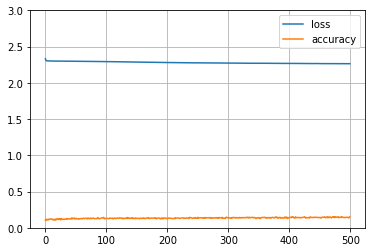

In [23]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 3) 
plt.show()

In [24]:
#evaluate
model.evaluate(
  x_test,
  to_categorical(y_test)
)

13/13 [==============================] - 0s 385us/step - loss: 2.2842 - accuracy: 0.1065


[2.284184455871582, 0.10653752833604813]

In [25]:
print(y_test.shape)

(413,)


In [26]:

predictions = model.predict(x_test[0:9])
print(predictions)

print(np.argmax(predictions, axis=1))

print("Check the truth")
print(y_test[0:9]) 

[[0.13812155 0.12008146 0.09773754 0.08165742 0.10373622 0.06528758
  0.10184798 0.12269851 0.09334105 0.07549064]
 [0.04840153 0.05378013 0.08266235 0.10773489 0.11915726 0.12323114
  0.12840798 0.10456369 0.10130878 0.13075234]
 [0.13629302 0.13263698 0.09682776 0.08965857 0.09721289 0.08327985
  0.09238733 0.11266457 0.09167794 0.06736103]
 [0.15731208 0.13600793 0.09792562 0.08209153 0.09756866 0.06415804
  0.09126976 0.11725233 0.0900999  0.06631414]
 [0.09186681 0.09055873 0.07157511 0.06832685 0.11622792 0.06250652
  0.14436387 0.14363028 0.11030938 0.10063453]
 [0.06370009 0.06649297 0.09956017 0.12913159 0.10705756 0.13465561
  0.09496424 0.08738829 0.10203282 0.11501671]
 [0.1451714  0.13254844 0.10324281 0.09020007 0.09586038 0.07786156
  0.08779937 0.10772026 0.09158933 0.06800642]
 [0.0827639  0.08634948 0.09544757 0.10546533 0.11049236 0.10685403
  0.10668921 0.10451846 0.10193623 0.09948339]
 [0.16831906 0.1488481  0.1094984  0.09324595 0.08827821 0.07660218
  0.07332406

# Logistic regression

In [27]:
orig_X = np.load('X.npy')
orig_Y = np.load('Y.npy')
print('finsihed reading data')
print(orig_X.shape)
print(orig_y.shape)

finsihed reading data
(2062, 64, 64)
(2062,)


In [28]:
orig_Y= np.argmax(orig_Y, axis = 1)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(orig_X,orig_Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1649, 64, 64)
(1649,)
(413, 64, 64)
(413,)


In [30]:
X_train = X_train.reshape(1649, 64*64)
X_test = X_test.reshape(413, 64*64)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\ihsan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=100)
softmax_reg.fit(X_train, Y_train)

C:\Users\ihsan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [33]:
print( softmax_reg.score(X_test, Y_test) )
print( softmax_reg.score(X_train, Y_train) )

0.7530266343825666
0.9957550030321407


In [34]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accVal = accuracy_score(Y_test, y_pred)
print(accVal)

0.7530266343825666
